In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log,dot,exp,shape

In [2]:
def sigmoid(z):
    sig = 1/(1+exp(-z))
    return sig

In [3]:
def cost(X,y,w):
    z = dot(X,w)
    c =(y.T.dot(log(sigmoid(z))))+((1-y).T.dot(log(1-sigmoid(z))))
    c = -c/len(y)
    return c

In [4]:
def predict(X,weights,add_intercept):
    if add_intercept:
         X = np.c_[np.ones((np.shape(X)[0],1)),X]
             
    z = dot(X,weights)
    lis = []
    for i in sigmoid(z):
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis

In [5]:
def logistic_regression(X, y, learning_rate, num_iterations, add_intercept):
    
    #initializing parameters
    
    if add_intercept:
        #with bias
        weights = np.zeros((np.shape(X)[1]+1,1))
        X = np.c_[np.ones((np.shape(X)[0],1)),X]
       
      
    else:
        #without bias
         weights = np.zeros((np.shape(X)[1],1))
    
   
    cost_list = []
    c=0
  
            
    for i in range(num_iterations): 
        weights = weights - (learning_rate*(dot(X.T,sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))))
        c=cost(X,y,weights)
        cost_list.append(c)
    
        
    return weights,cost_list 

#### read data

In [6]:
data_train = pd.read_csv('clean1.data')
data_test = pd.read_csv('clean2.data')
data_train =data_train.drop(['MUSK-188', '188_1+1'], axis=1)
data_test =data_test.drop(['MUSK-211', '211_1+1'], axis=1)
X_train,y_train = data_train.drop('1.',axis=1),data_train['1.']
y_train =y_train.to_numpy()
X_test,y_test = data_test.drop('1.',axis=1),data_test['1.']
y_test =y_test.to_numpy()

In [7]:
data_train.head()

,42,-198,-109,-75,-117,11,23,-88,-28,-27,...,-74,-129,-120.2,-38.1,30,48.1,-37.2,6.1,30.1,1.
0,42,-191,-142,-65,-117,55,49,-170,-45,5,...,-302,60,-120,-39,31,48,-37,5,30,1.0
1,42,-191,-142,-75,-117,11,49,-161,-45,-28,...,-73,-127,-120,-38,30,48,-37,5,31,1.0
2,42,-198,-110,-65,-117,55,23,-95,-28,5,...,-302,60,-120,-39,30,48,-37,6,30,1.0
3,42,-198,-102,-75,-117,10,24,-87,-28,-28,...,-73,-127,51,128,144,43,-30,14,26,1.0
4,42,-191,-142,-65,-117,55,49,-170,-45,6,...,-300,61,51,127,143,42,-31,14,26,1.0


In [8]:
X_test.head()

,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308.1,52,-7,39,126,156,-50.1,-112,96
0,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
1,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
2,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80
4,46,-194,-145,28,-117,72,57,-168,-39,-22,...,-239,-138,-156,56,143,142,164,-67,-145,40


#### Normalize the data

In [9]:
X_train_norm = (X_train - np.average(X_train)) / (np.std(X_train))
X_test_norm = (X_test - np.average(X_test)) / (np.std(X_test))

با روش دیگری میتوان داده ها را نرمال سازی کرد که داده را از حداقل کم میکنیم و بر حداکثر منهای حداقل تقسیم میکنیم ولی با این روش دقت بهتر شد

In [44]:
w,c = logistic_regression(X_train_norm,y_train,learning_rate=0.00001,num_iterations=1000,add_intercept= 0)

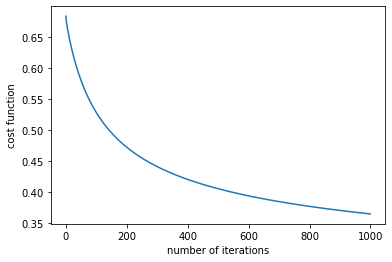

In [45]:
plt.plot(c)
plt.xlabel("number of iterations")
plt.ylabel("cost function")
plt.show()

In [12]:
y_pred =predict(X_test_norm,w,0)

In [13]:
acc = np.sum(np.equal(y_test, y_pred)) / len(y_test)

In [14]:
acc

0.804456571168713

In [15]:
error = 1-acc

In [16]:
error

0.19554342883128695

In [17]:
w1,c1 = logistic_regression(X_train_norm,y_train,learning_rate=0.0000001,num_iterations=1000,add_intercept= 0)

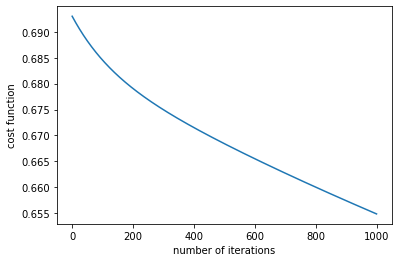

In [18]:
plt.plot(c1)
plt.xlabel("number of iterations")
plt.ylabel("cost function")
plt.show()

زمانی که نرخ یادگیری را خیلی خیلی کوچک در نظر گرفتیم خطا زیاد تغییری نکرده و مقدار کمتری کاهش پیدا کرده است همچنین اگر نرخ یادگیری را بزرگ در نظر بگیریم نویزی میشود  و خطا همچنان زیاد است مقدار مناسب آن :0.00001

In [19]:
y_pred1 =predict(X_test_norm,w1,0)

In [20]:
acc1 = np.sum(np.equal(y_test, y_pred1)) / len(y_test)

In [21]:
acc1

0.8475064423222677

In [22]:
error1 = 1-acc1 

In [23]:
error1

0.15249355767773232

### Recall

In [24]:
from sklearn.metrics import recall_score

In [25]:
recall = recall_score(y_test, y_pred)

In [26]:
recall

0.6318897637795275

### Accuracy

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)

In [29]:
accuracy

0.804456571168713

### F1 Score

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score = f1_score(y_test, y_pred)

In [32]:
f1_score

0.4988344988344988